# Beyond linear separation in classification

A **linear classification model**
expects the **data** to be **linearly separable**. When this assumption does not
hold, the model is not expressive enough to properly fit the data.
Therefore, we need to apply the same tricks as in regression: **feature
augmentation** (potentially using **expert-knowledge**) or using a
**kernel-based method**.

We will provide **examples** where we will use a **kernel support vector machine**
to perform classification on some **toy-datasets** with two features where it is impossible to
find a perfect linear separation.

First, we redefine our plotting utility to show the decision boundary of a
classifier.

In [18]:
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # Plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu")

    return ax

We will generate a first dataset where the data are represented as **two
interlaced half circles**. This dataset is generated using the function
[`sklearn.datasets.make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html).

In [19]:
import pandas as pd
from sklearn.datasets import make_moons

feature_names = ["Feature #0", "Features #1"]
target_name = "class"

X, y = make_moons(n_samples=100, noise=0.13, random_state=42)

# We store both the data and target in a dataframe to ease plotting
moons = pd.DataFrame(np.c_[X, y],
                     columns=feature_names + [target_name])
data_moons, target_moons = moons[feature_names], moons[target_name]

range_features_moons = {"Feature #0": (-2, 2.5), "Feature #1": (-2, 2)}

Since the dataset contains only two features, we can make a scatter plot to
have a look at it.

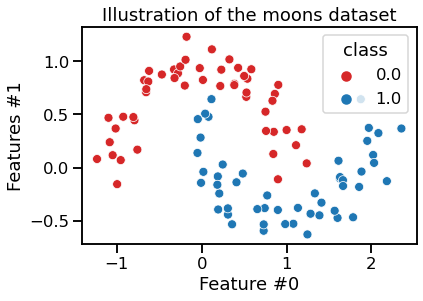

In [20]:
import seaborn as sns

sns.scatterplot(data=moons, x=feature_names[0], y=feature_names[1],
                hue=target_moons, palette=["tab:red", "tab:blue"])
_ = plt.title("Illustration of the moons dataset")

From the intuitions that we got by studying linear models, it should be
obvious that a **linear classifier** will **no**t be able to find a **perfect decision
function** to separate the two classes.

Let's try to see what is the decision boundary of such a linear classifier.
We will create a predictive model by standardizing the dataset followed by
a **linear support vector machine classifier**.

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

linear_model = make_pipeline(StandardScaler(), SVC(kernel="linear"))
linear_model.fit(data_moons, target_moons)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

<div class="admonition warning alert alert-danger">
<p class="first admonition-title" style="font-weight: bold;">Warning</p>
<p class="last">Be aware that we fit and will check the boundary decision of the classifier
on the same dataset without splitting the dataset into a training set and a
testing set. While this is a bad practice, we use it for the sake of
simplicity to depict the model behavior. Always use cross-validation when
you want to assess the statistical performance of a machine-learning model.</p>
</div>

Let's check the decision boundary of such a linear model on this dataset.

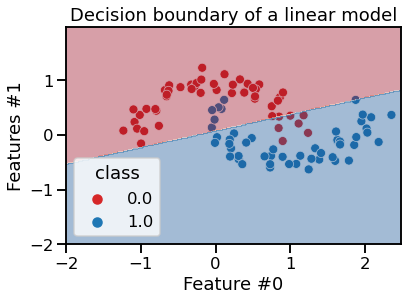

In [22]:
ax = sns.scatterplot(data=moons, x=feature_names[0], y=feature_names[1],
                     hue=target_moons, palette=["tab:red", "tab:blue"])
plot_decision_function(linear_model, range_features_moons, ax=ax)
_ = plt.title("Decision boundary of a linear model")

As expected, a **linear decision boundary** is **not flexible enough** to split the
two classes.

To push this example to the limit, we will create another dataset where
samples of a class will be surrounded by samples from the other class.

In [31]:
from sklearn.datasets import make_gaussian_quantiles

feature_names = ["Feature #0", "Features #1"]
target_name = "class"

X, y = make_gaussian_quantiles(
    n_samples=100, n_features=2, n_classes=2, random_state=42)
gauss = pd.DataFrame(np.c_[X, y], columns=feature_names + [target_name])
data_gauss, target_gauss = gauss[feature_names], gauss[target_name]

range_features_gauss = {"Feature #0": (-4, 4), "Feature #1": (-4, 4)}

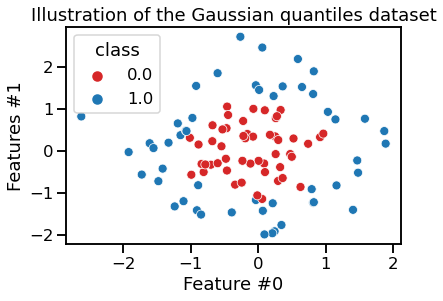

In [32]:
ax = sns.scatterplot(data=gauss, x=feature_names[0], y=feature_names[1],
                     hue=target_gauss, palette=["tab:red", "tab:blue"])
_ = plt.title("Illustration of the Gaussian quantiles dataset")

Here, a linear decision boundary cannot separate the two classes. We can check what decision boundary a linear support vector machine will find.

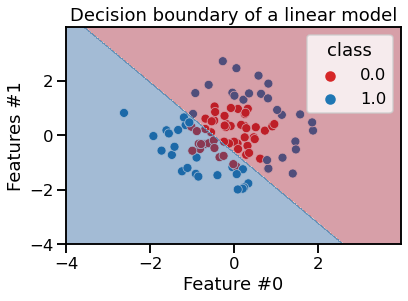

In [25]:
linear_model.fit(data_gauss, target_gauss)
ax = sns.scatterplot(data=gauss, x=feature_names[0], y=feature_names[1],
                     hue=target_gauss, palette=["tab:red", "tab:blue"])
plot_decision_function(linear_model, range_features_gauss, ax=ax)
_ = plt.title("Decision boundary of a linear model")

As expected, a linear separation cannot be used to separate the classes
properly: the model under-fits, and it is a bad fit even on
the training set.

In the section about linear regression, we saw that we could use several
**tricks** to make a **linear model more flexible** by **augmenting the feature set** or
using a **kernel**. Here, we use the latter trick using a **radial basis
function (RBF) kernel** together with a support vector machine classifier.

Below we repeat the two previous experiments, the half moons and the Gaussian quantiles, and check the obtained decision function.

In [33]:
kernel_model = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=5))

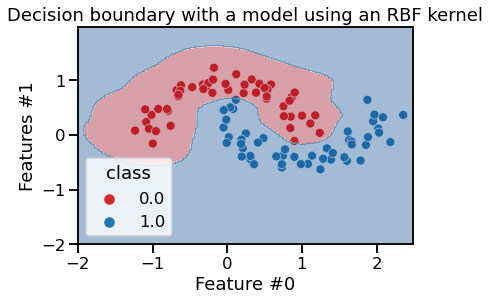

In [34]:
kernel_model.fit(data_moons, target_moons)
ax = sns.scatterplot(data=moons, x=feature_names[0], y=feature_names[1],
                     hue=target_moons, palette=["tab:red", "tab:blue"])
plot_decision_function(kernel_model, range_features_moons, ax=ax)
_ = plt.title("Decision boundary with a model using an RBF kernel")

We see that the **decision boundary** is **not anymore a straight line**. Indeed,
an area is defined around the red samples and we could imagine that this
classifier should be able to generalize on unseen data.

Let's check the decision boundary on the second dataset.

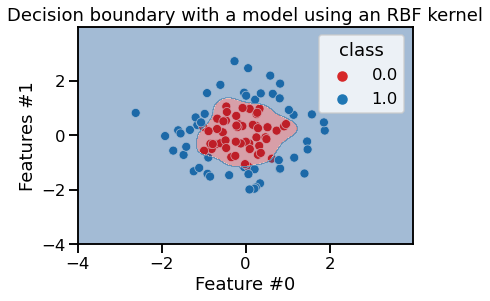

In [35]:
kernel_model.fit(data_gauss, target_gauss)
ax = sns.scatterplot(data=gauss, x=feature_names[0], y=feature_names[1],
                     hue=target_gauss, palette=["tab:red", "tab:blue"])
plot_decision_function(kernel_model, range_features_gauss, ax=ax)
_ = plt.title("Decision boundary with a model using an RBF kernel")

We observe something similar than in the previous case. The decision boundary
is more flexible and does not underfit anymore.

Thus, kernel trick or feature expansion are the tricks to make a linear
classifier more expressive, exactly as we saw in regression.

Keep in mind that adding flexibility to a model can also risk increasing
overfitting by making the decision function to sensitive to individual
(possibly noisy) data points of the training set. Here we can observe that
the decision functions remain smooth enough to preserve good generalization.
If you are curious, you can try repeated the above experiment with
`gamma=100` and look at the decision functions.

In [43]:
kernel_model = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=50))

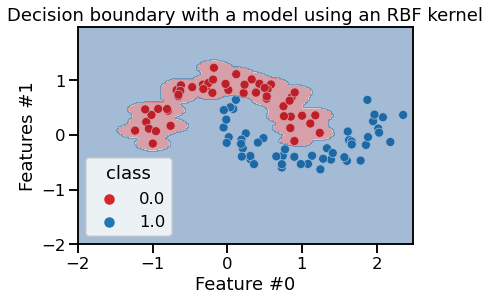

In [44]:
kernel_model.fit(data_moons, target_moons)
ax = sns.scatterplot(data=moons, x=feature_names[0], y=feature_names[1],
                     hue=target_moons, palette=["tab:red", "tab:blue"])
plot_decision_function(kernel_model, range_features_moons, ax=ax)
_ = plt.title("Decision boundary with a model using an RBF kernel")

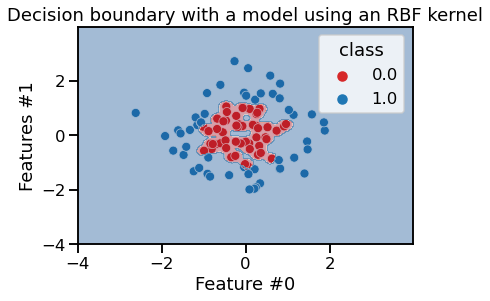

In [45]:
kernel_model.fit(data_gauss, target_gauss)
ax = sns.scatterplot(data=gauss, x=feature_names[0], y=feature_names[1],
                     hue=target_gauss, palette=["tab:red", "tab:blue"])
plot_decision_function(kernel_model, range_features_gauss, ax=ax)
_ = plt.title("Decision boundary with a model using an RBF kernel")

In [47]:
kernel_model = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=100))

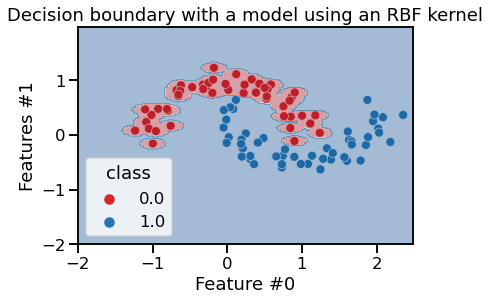

In [48]:
kernel_model.fit(data_moons, target_moons)
ax = sns.scatterplot(data=moons, x=feature_names[0], y=feature_names[1],
                     hue=target_moons, palette=["tab:red", "tab:blue"])
plot_decision_function(kernel_model, range_features_moons, ax=ax)
_ = plt.title("Decision boundary with a model using an RBF kernel")

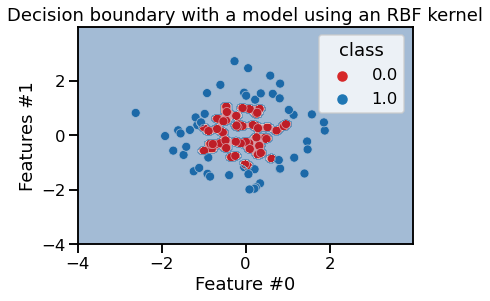

In [49]:
kernel_model.fit(data_gauss, target_gauss)
ax = sns.scatterplot(data=gauss, x=feature_names[0], y=feature_names[1],
                     hue=target_gauss, palette=["tab:red", "tab:blue"])
plot_decision_function(kernel_model, range_features_gauss, ax=ax)
_ = plt.title("Decision boundary with a model using an RBF kernel")